[*********************100%***********************]  1 of 1 completed
Mean Absolute Error: 319.1960593767395
Mean Squared Error: 218508.12283617095
Root Mean Squared Error: 467.44852426355027
R-squared: 0.9981705638276529


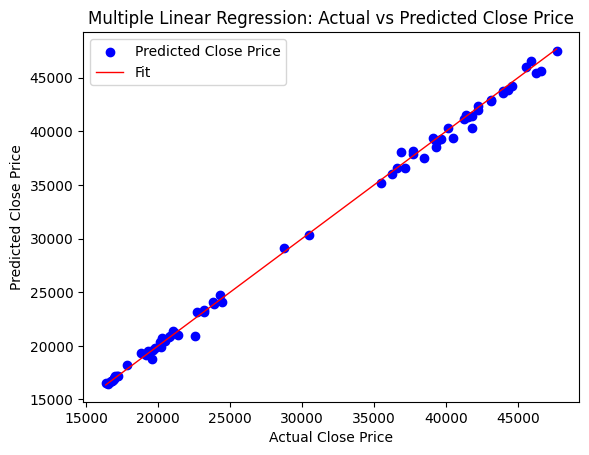

In [6]:
# ref: https://scholarworks.uni.edu/cgi/viewcontent.cgi?article=1016&context=jucie

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

stock_symbol = "BTC-USD"
start_date = "2022-01-01"
end_date = "2022-12-31"

data = yf.download(stock_symbol, start=start_date, end=end_date)

features = data[["High", "Low", "Open"]]
target = data["Close"]

# split the data into training and testing sets 80-20
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()

# fit the model using training data
model.fit(features_train, target_train)

coefficients = model.coef_
intercept = model.intercept_

# for coeff, feature in enumerate(features.columns):
#     print(f"Coefficient for {feature}: {coefficients[coeff]}")
# print(f"Intercept: {intercept}")

target_pred = model.predict(features_test)

# evaluate the model performance
mae = metrics.mean_absolute_error(target_test, target_pred)
mse = metrics.mean_squared_error(target_test, target_pred)
rsmse = metrics.mean_squared_error(target_test, target_pred, squared=False)
r_squared = metrics.r2_score(target_test, target_pred)

# print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rsmse)
print("R-squared:", r_squared)

# plot the results
plt.scatter(target_test, target_pred, color='blue', label='Predicted Close Price')
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color='red', linestyle='-', linewidth=1, label='Fit')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Close Price')
plt.legend()
plt.show()
